In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    normalization = 1/(2*y.shape[0])
    yy = np.array([y]).T

    MSE = normalization * np.sum(np.power( yy - np.dot(tx, w), 2))
    return MSE
    raise NotImplementedError
    
def compute_mse(y, tx, beta):
    """compute the loss by mse."""
    e = y - tx.dot(beta)
    mse = e.dot(e) / (2 * len(e))
    return mse

# Least squares and linear basis functions models
## Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w = np.array([np.dot(np.dot(np.linalg.inv(np.dot(tx.T, tx)), tx.T), y)]).T
    mse = compute_loss(y, tx, w)
    return mse, w
    raise NotImplementedError
    
x = np.array([[1,2],[3,4],[5,6]])
y = np.array([5,4,3])
# print(np.array([np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)]).T)
least_squares(y,x)


(6.7329278260613358e-28, array([[-6. ],
        [ 5.5]]))

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    mse_ls, w_ls = least_squares(y, tx)
    print("Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626")
    print("Least Squares: mse={0}, w0={1}, w1={2}.".format(mse_ls, w_ls[0][0], w_ls[1][0]))
    return
    raise NotImplementedError

test_your_least_squares()

Grid Search: loss*=15.55870336860953, w0*=72.72727272727272, w1*=13.636363636363626
Least Squares: mse=15.385887868829402, w0=73.2939220021052, w1=13.479712434989045.


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [4]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [5]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    phi = np.zeros((x.shape[0], degree+1))
    for i in range(0, degree+1):
        phi[:,i] = np.power(x,i)
    return phi
    raise NotImplementedError
build_poly(x,2)

array([[  1.00000000e+00,   3.52374910e-01,   1.24168077e-01],
       [  1.00000000e+00,   4.89512330e+00,   2.39622321e+01],
       [  1.00000000e+00,   1.86662437e+00,   3.48428655e+00],
       [  1.00000000e+00,   3.50706129e+00,   1.22994789e+01],
       [  1.00000000e+00,   3.38087384e+00,   1.14303079e+01],
       [  1.00000000e+00,   7.30937276e-01,   5.34269301e-01],
       [  1.00000000e+00,   3.88562366e+00,   1.50980712e+01],
       [  1.00000000e+00,   5.65224803e+00,   3.19479078e+01],
       [  1.00000000e+00,   6.28318531e+00,   3.94784176e+01],
       [  1.00000000e+00,   2.37137419e+00,   5.62341557e+00],
       [  1.00000000e+00,   6.04749821e-01,   3.65722346e-01],
       [  1.00000000e+00,   3.63324875e+00,   1.32004965e+01],
       [  1.00000000e+00,   8.57124731e-01,   7.34662804e-01],
       [  1.00000000e+00,   2.49756165e+00,   6.23781420e+00],
       [  1.00000000e+00,   1.61424946e+00,   2.60580133e+00],
       [  1.00000000e+00,   5.39987312e+00,   2.9158629

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907205
Processing 4th experiment, degree=12, rmse=1.3106193798124992


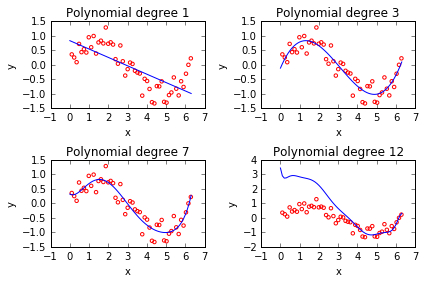

In [6]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        phi = build_poly(x, degree)

        mse, weight = least_squares(y, phi)
        rmse = np.sqrt(2*mse)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [3]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    shuffled_x = np.random.permutation(x)
    np.random.seed(seed)
    shuffled_y = np.random.permutation(y)
    
    test_x_size = shuffled_x.shape[0] * ratio
    training_x = shuffled_x[0:test_x_size]
    test_x = shuffled_x[-test_x_size:]
    
    test_y_size = shuffled_y.shape[0] * ratio
    training_y = shuffled_y[0:test_y_size]
    test_y = shuffled_y[-test_y_size:]

    return training_x, test_x, training_y, test_y
xx = np.array([0,1,2,3,4,5,6,7,8,9])
yy = np.array([0,1,2,3,4,5,6,7,8,9])
split_data(xx, yy, 0.5)

/home/laz/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/laz/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/laz/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/laz/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(array([2, 9, 6, 4, 0]),
 array([3, 1, 7, 8, 5]),
 array([2, 9, 6, 4, 0]),
 array([3, 1, 7, 8, 5]))

Then, test your `split_data` function below.

In [8]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    train_x, test_x, train_y, test_y = split_data(x,y,ratio)
    # ***************************************************
    train_phi = build_poly(train_x, degree)
    test_phi = build_poly(test_x, degree)
    # ***************************************************
    train_mse, train_weight = least_squares(train_y, train_phi)
    test_mse = compute_loss(test_y, test_phi, train_weight)
    # ***************************************************
    rmse_tr = np.sqrt(2*train_mse)
    rmse_te = np.sqrt(2*test_mse)

    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.456
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.250
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.244
proportion=0.9, degree=12, Training RMSE=6.898, Testing RMSE=7.042
proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.553
proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.306
proportion=0.5, degree=7, Training RMSE=0.218, Testing RMSE=0.336
proportion=0.5, degree=12, Training RMSE=1.097, Testing RMSE=1.276
proportion=0.1, degree=1, Training RMSE=0.453, Testing RMSE=0.904
proportion=0.1, degree=3, Training RMSE=0.111, Testing RMSE=0.753
proportion=0.1, degree=7, Training RMSE=1.375, Testing RMSE=3.637
proportion=0.1, degree=12, Training RMSE=5.416, Testing RMSE=163.691


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Ridge Regression
Please fill in the function below.

In [9]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    N = tx.shape[0]
    M = tx.shape[1]
    w = np.array([np.dot(np.dot(np.linalg.inv(np.dot(tx.T, tx) + (2*N*lamb)*np.identity(M)), tx.T), y)]).T
    mse = compute_loss(y, tx, w)
    return mse, w
    raise NotImplementedError
    
xx = np.array([[1,2],[3,4],[5,6]])
yy = np.array([5,4,3])
ridge_regression(yy,xx,0)

# least_squares result:
#     (6.7329278260613358e-28, array([[-6. ],
#         [ 5.5]]))

(6.7329278260613358e-28, array([[-6. ],
        [ 5.5]]))

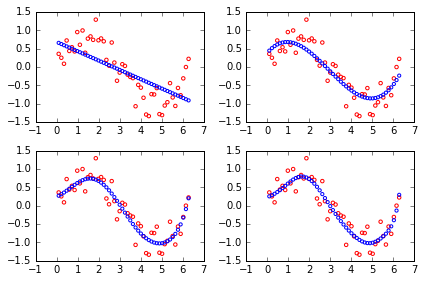

In [10]:
def plot_ridge(y, x, lamb):
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # plot fit
        ax = axs[ind // num_col][ind % num_col]
    
        ax.scatter(x, y, color='b', s=12, facecolors='none', edgecolors='r')
        xvals = np.arange(min(x) - 0.1, max(x) + 0.1, 0.1)
        tx = build_poly(x, degree)
        mse, weights = ridge_regression(y, tx, lamb)
        f = tx.dot(weights)
        #ax.plot(x, f.T[0])
        ax.scatter(x, f.T[0], color='r', s=10, facecolors='none', edgecolors='b')
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()
plot_ridge(y, x, 0.025)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


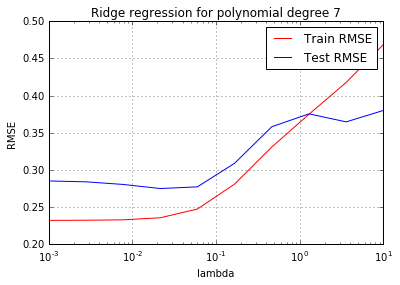

In [11]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    # ***************************************************
    train_x, test_x, train_y, test_y = split_data(x, y, ratio, seed)
    # ***************************************************
    train_phi = build_poly(train_x, degree)
    test_phi = build_poly(test_x, degree)
    # ***************************************************
    train_rmses = np.array([])
    test_rmses = np.array([])
    for lambd in np.nditer(lambdas):
        train_mse, train_weight = ridge_regression(train_y, train_phi, lambd)
        test_mse = compute_loss(test_y, test_phi, train_weight)
        rmse_tr = np.sqrt(2*train_mse)
        rmse_te = np.sqrt(2*test_mse)
    
        train_rmses = np.append(train_rmses, rmse_tr)
        test_rmses = np.append(test_rmses, rmse_te)

    plt.semilogx(lambdas, train_rmses, 'r', lambdas, test_rmses, 'b')
    plt.title('Ridge regression for polynomial degree 7')
    plt.grid(True)
    plt.xlabel('lambda')
    plt.ylabel('RMSE')
    plt.legend(['Train RMSE', 'Test RMSE'])

seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)